In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score,classification_report,r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier,BaggingClassifier



In [4]:
df = pd.read_csv("/content/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [7]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)


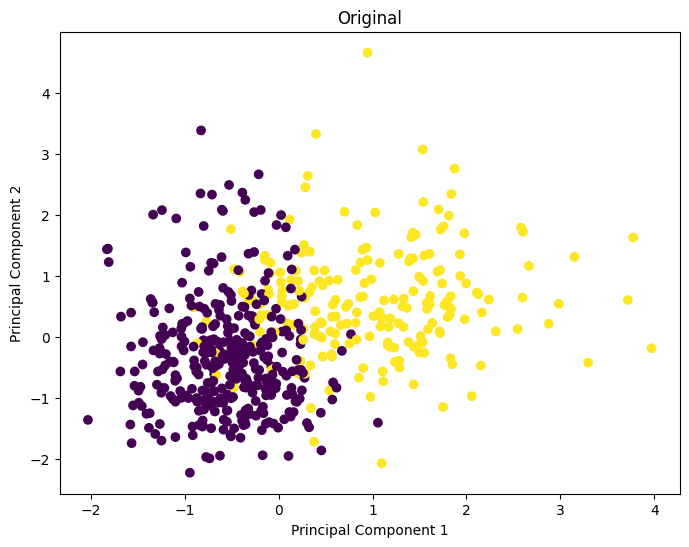

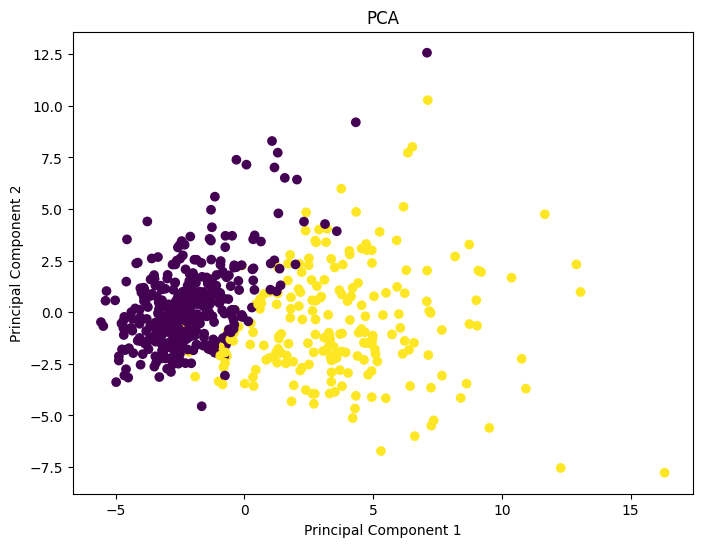

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Original')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
m1 = LogisticRegression()
m1.fit(x_train,y_train)
y_pred = m1.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
m1 = LogisticRegression()
m1.fit(x_train,y_train)
y_pred = m1.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9912280701754386
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [13]:
#DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
m2 = DecisionTreeClassifier()
m2.fit(x_train,y_train)
y_pred = m2.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9473684210526315


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
m2 = DecisionTreeClassifier()
m2.fit(x_train,y_train)
y_pred = m2.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9649122807017544


In [15]:
#SVC
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
m3 = SVC()
m3.fit(x_train,y_train)
y_pred = m3.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9473684210526315


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
m3 = SVC()
m3.fit(x_train,y_train)
y_pred = m3.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9649122807017544


In [17]:
#KNeighborsClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
m4 = KNeighborsClassifier()
m4.fit(x_train,y_train)
y_pred = m4.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.956140350877193


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
m4 = KNeighborsClassifier()
m4.fit(x_train,y_train)
y_pred = m4.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9736842105263158


In [19]:
#RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
m5 = RandomForestClassifier()
m5.fit(x_train,y_train)
y_pred = m5.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9649122807017544


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
m5 = RandomForestClassifier()
m5.fit(x_train,y_train)
y_pred = m5.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9824561403508771


In [21]:
#GradientBoostingClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
m6 = GradientBoostingClassifier()
m6.fit(x_train,y_train)
y_pred = m6.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.956140350877193


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
m6 = GradientBoostingClassifier()
m6.fit(x_train,y_train)
y_pred = m6.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9824561403508771


In [23]:
#AdaBoostClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
m7 = AdaBoostClassifier()
m7.fit(x_train,y_train)
y_pred = m7.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9649122807017544


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
m7 = AdaBoostClassifier()
m7.fit(x_train,y_train)
y_pred = m7.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9824561403508771


In [25]:
#StackingClassifier
ems = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('gdc', GradientBoostingClassifier()),
    ('svc', SVC(kernel='rbf', probability=True))
]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
m8 = StackingClassifier(estimators=ems,final_estimator=DecisionTreeClassifier(max_depth=3))
m8.fit(x_train,y_train)
y_pred = m8.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9736842105263158


In [26]:
ems = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('gdc', GradientBoostingClassifier()),
    ('svc', SVC(kernel='rbf', probability=True))
]
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
m8 = StackingClassifier(estimators=ems,final_estimator=DecisionTreeClassifier(max_depth=3))
m8.fit(x_train,y_train)
y_pred = m8.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9298245614035088


In [27]:
#BaggingClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
m9 = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=10,random_state=42)
m9.fit(x_train,y_train)
y_pred = m9.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.956140350877193


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
m9 = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=10,random_state=42)
m9.fit(x_train,y_train)
y_pred = m9.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9824561403508771
